In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import theano

import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
print(os.listdir("/content/sample_data"))

In [ ]:

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive')


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


In [ ]:
# Importing the dataset
churn_data = pd.read_csv('/content/gdrive/MyDrive/AIA - Studio - Team 10/860_map_full_spectrum_combined_categories.csv')

In [ ]:
churn_data.columns=churn_data.columns.str.replace("'","").str.strip()


In [ ]:
churn_data.columns

Index(['Unnamed: 0', 'filename', 'aliceblue', 'antiquewhite', 'aqua',
       'aquamarine', 'azure', 'beige', 'bisque', 'black',
       ...
       'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white',
       'whitesmoke', 'yellow', 'yellowgreen', 'category'],
      dtype='object', length=151)

In [ ]:
churn_data.drop("Unnamed: 0",inplace=True, axis=1)

In [ ]:
churn_data.head()

,filename,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,darkturquoise,...,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,rebeccapurple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen,category
0,TQ 3231 8067,276,7130,0,5,142,7179,4303,49,951,3,0,46,8916,35,0,1,0,132,535,3,0,0,0,0,0,0,20480,5316,0,1445,0,0,128,883,697,70,0,1080,0,...,132,1737,2,142,1049,654,2091,4,2113,0,6,51,3263,3,211,5,14,12,696,353,88801,81,136,758,0,11799,0,56,9429,0,1867,3,0,0,6355,19196,11792,0,5,Ocean
1,TQ 2835 9963,570,2185,0,0,49,5280,1161,0,346,0,0,0,2047,39,0,0,0,14,334,0,0,0,0,0,0,0,11395,1779,0,138,0,0,0,8,11709,1,0,22,0,...,1430,1519,0,74,169,58,603,0,11868,0,0,0,804,0,4,0,6,51,137,128,143161,11,29,119,0,4627,0,25,3422,0,584,0,0,0,1788,21000,9441,0,0,Vehicle
2,TQ 3231 9963,127,10784,0,0,10,225440,896,0,511,0,0,0,146,6,0,0,0,1,151,0,0,0,0,0,0,0,6741,675,0,129,0,0,0,416,58208,8,0,167,0,...,1694,479,724,159,664,129,292,17,1698,0,4,0,562,0,2,0,0,413,179,1,70378,3,20,60,0,1494,0,4,1540,0,279,0,0,0,4478,5283,3823,0,0,Animal
3,TQ 3627 9963,901,2959,0,8,72,7615,1439,21,422,0,0,0,1305,1707,0,0,0,742,263,0,0,0,0,0,0,0,12875,1665,0,455,0,0,0,3,10394,225,0,552,0,...,401,4461,0,189,1080,166,315,2,6795,0,15,0,692,5,41,0,4,262,413,89,102373,947,232,228,0,6310,0,166,4038,0,2651,0,0,0,7006,16697,12622,0,0,Vehicle
4,TQ 2043 9584,17,8304,0,0,5,107307,1384,0,347,0,0,0,5383,12,0,0,0,0,57,0,0,0,0,0,0,0,10228,1856,0,189,0,0,0,2486,86683,0,0,8,0,...,513,2288,3566,83,964,55,1979,2,682,0,0,0,3073,0,49,0,0,170,37,361,52611,2,1,3,0,1415,0,0,4694,0,815,0,0,0,6007,5218,3405,0,0,Animal


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Columns: 150 entries, filename to category
dtypes: int64(148), object(2)
memory usage: 1007.9+ KB


In [ ]:
churn_data['azure'].value_counts()

41     12
45     12
46     12
59     12
37     11
       ..
197     1
195     1
194     1
191     1
1       1
Name: azure, Length: 249, dtype: int64

In [ ]:
churn_data.describe()

,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,darkturquoise,darkviolet,...,palegoldenrod,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,rebeccapurple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen
count,860.000000,860.000000,860.0,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.0,860.000000,860.000000,860.000000,860.000000,860.000000,860.0,860.000000,860.000000,860.000000,860.0,860.000000,860.000000,860.000000,860.0,860.000000,860.0,860.000000,860.000000,860.000000,860.000000,860.000000,860.0,860.000000,860.000000,860.0,...,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.0,860.000000,860.0,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.0,860.000000
mean,256.820930,4313.786047,0.0,2.768605,94.679070,14505.191860,2670.269767,34.847674,521.630233,0.725581,0.001163,7.266279,4901.033721,57.034884,0.0,0.073256,0.123256,151.004651,276.529070,0.840698,0.0,0.118605,0.011628,1.690698,0.0,1.660465,17192.726744,1744.300000,0.0,483.844186,0.0,0.013953,23.416279,685.387209,11200.433721,46.275581,0.0,466.268605,0.025581,0.0,...,12853.820930,305.109302,2051.158140,71.847674,111.113953,533.063953,138.767442,1249.532558,6.061628,4863.317442,0.086047,2.647674,7.976744,2148.246512,1.423256,98.252326,6.295349,2.738372,62.873256,470.231395,224.186047,76381.845349,192.236047,69.520930,246.505814,0.0,8793.053488,0.0,40.720930,5134.195349,0.002326,1611.895349,0.587209,0.013953,0.010465,3161.895349,25813.258140,11700.820930,0.0,1.706977
std,171.738689,1913.983118,0.0,2.948323,73.324398,25192.541342,1293.750935,63.214963,293.166079,2.012544,0.034100,12.197827,3400.415768,179.121647,0.0,0.355212,0.468986,340.782319,118.698365,2.135998,0.0,0.412130,0.166746,3.072224,0.0,3.108600,6016.658265,1132.646158,0.0,249.856725,0.0,0.135762,39.467807,706.595945,16800.208150,89.036818,0.0,542.890313,0.185119,0.0,...,18773.666532,349.104909,1480.043192,446.242067,89.584481,288.467513,198.697193,756.637391,8.190381,4338.564573,0.736250,4.155903,14.061214,1420.911588,2.667865,96.831949,13.514145,3.263752,89.405377,341.969910,164.393287,25825.558641,507.171823,59.384627,205.678391,0.0,3678.980496,0.0,40.706637,2133.859803,0.048196,2152.161194,1.365831,0.135762,0.122573,1456.229873,10727.635491,2842.203599,0.0,3.565152
min,11.000000,654.000000,0.0,0.000000,1.000000,2008.000000,187.000000,0.000000,40.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4633.000000,2.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,192.000000,0.000000,0.0,0.000000,0.000000,0.0,...,316.000000,2.000000,15.000000,0.000000,4.000000,21.000000,0.000000,14.000000,0.000000,47.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,17246.000000,0.000000,0.000000,0.000000,0.0,579.000000,0.0,0.000000,310.000000,0.000000,34.000000,0.000000,0.000000,0.000000,279.000000,1848.000000,1414.000000,0.0,0.000000
25%,137.000000,2870.250000,0.0,1.000000,41.000000,5796.500000,1698.000000,0.000000,329.750000,0.000000,0.000000,0.000000,2078.250000,7.

In [ ]:
churn_data.head()

,filename,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,darkturquoise,...,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,rebeccapurple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen,category
0,TQ 3231 8067,276,7130,0,5,142,7179,4303,49,951,3,0,46,8916,35,0,1,0,132,535,3,0,0,0,0,0,0,20480,5316,0,1445,0,0,128,883,697,70,0,1080,0,...,132,1737,2,142,1049,654,2091,4,2113,0,6,51,3263,3,211,5,14,12,696,353,88801,81,136,758,0,11799,0,56,9429,0,1867,3,0,0,6355,19196,11792,0,5,Ocean
1,TQ 2835 9963,570,2185,0,0,49,5280,1161,0,346,0,0,0,2047,39,0,0,0,14,334,0,0,0,0,0,0,0,11395,1779,0,138,0,0,0,8,11709,1,0,22,0,...,1430,1519,0,74,169,58,603,0,11868,0,0,0,804,0,4,0,6,51,137,128,143161,11,29,119,0,4627,0,25,3422,0,584,0,0,0,1788,21000,9441,0,0,Vehicle
2,TQ 3231 9963,127,10784,0,0,10,225440,896,0,511,0,0,0,146,6,0,0,0,1,151,0,0,0,0,0,0,0,6741,675,0,129,0,0,0,416,58208,8,0,167,0,...,1694,479,724,159,664,129,292,17,1698,0,4,0,562,0,2,0,0,413,179,1,70378,3,20,60,0,1494,0,4,1540,0,279,0,0,0,4478,5283,3823,0,0,Animal
3,TQ 3627 9963,901,2959,0,8,72,7615,1439,21,422,0,0,0,1305,1707,0,0,0,742,263,0,0,0,0,0,0,0,12875,1665,0,455,0,0,0,3,10394,225,0,552,0,...,401,4461,0,189,1080,166,315,2,6795,0,15,0,692,5,41,0,4,262,413,89,102373,947,232,228,0,6310,0,166,4038,0,2651,0,0,0,7006,16697,12622,0,0,Vehicle
4,TQ 2043 9584,17,8304,0,0,5,107307,1384,0,347,0,0,0,5383,12,0,0,0,0,57,0,0,0,0,0,0,0,10228,1856,0,189,0,0,0,2486,86683,0,0,8,0,...,513,2288,3566,83,964,55,1979,2,682,0,0,0,3073,0,49,0,0,170,37,361,52611,2,1,3,0,1415,0,0,4694,0,815,0,0,0,6007,5218,3405,0,0,Animal


In [ ]:
# Transform into a categorical variable
churn_data.category = pd.Categorical(churn_data.category)
print(churn_data.category.cat.categories)
print(len(churn_data.category.cat.categories))
for i, classes in enumerate(churn_data.category.cat.categories):
  print(i,classes)

Index(['Alarm', 'Animal', 'Bird', 'Bird vocalization, bird call, bird song',
       'Boat, Water vehicle', 'Clip-clop', 'Crow',
       'Electric shaver, electric razor', 'Environmental noise', 'Explosion',
       'Insect', 'Inside, small room', 'Liquid', 'Mechanical fan',
       'Mechanisms', 'Music', 'Ocean', 'Outside, rural or natural',
       'Outside, urban or manmade', 'Pour', 'Rain', 'Rustle', 'Silence',
       'Speech', 'Spray', 'Stream', 'Vehicle', 'Water', 'White noise',
       'Wild animals', 'Wind'],
      dtype='object')
31
0 Alarm
1 Animal
2 Bird
3 Bird vocalization, bird call, bird song
4 Boat, Water vehicle
5 Clip-clop
6 Crow
7 Electric shaver, electric razor
8 Environmental noise
9 Explosion
10 Insect
11 Inside, small room
12 Liquid
13 Mechanical fan
14 Mechanisms
15 Music
16 Ocean
17 Outside, rural or natural
18 Outside, urban or manmade
19 Pour
20 Rain
21 Rustle
22 Silence
23 Speech
24 Spray
25 Stream
26 Vehicle
27 Water
28 White noise
29 Wild animals
30 Wind


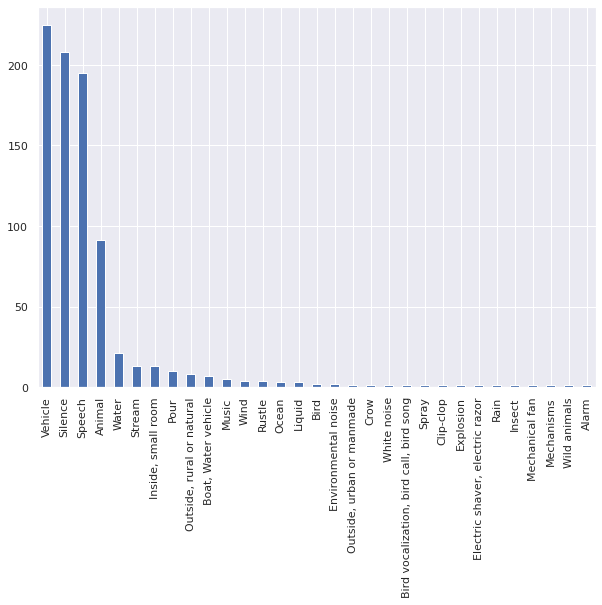

In [ ]:
#frequency of occurance
churn_data.category.value_counts().plot(kind="bar",figsize=(10,7))

In [ ]:
# Assign a number to each category (label encoding)
churn_data.category = churn_data.category.cat.codes 
if churn_data.category.min()<0:
  shift=abs(churn_data.category.min())
  churn_data.category+=shift

# Print the label encoded competitors
print('Label encoded category: \n',churn_data.head())

Label encoded category: 
        filename  aliceblue  antiquewhite  ...  yellow  yellowgreen  category
0  TQ 3231 8067        276          7130  ...       0            5        17
1  TQ 2835 9963        570          2185  ...       0            0        27
2  TQ 3231 9963        127         10784  ...       0            0         2
3  TQ 3627 9963        901          2959  ...       0            0        27
4  TQ 2043 9584         17          8304  ...       0            0         2

[5 rows x 150 columns]


In [ ]:
selected_classes=np.logical_and(churn_data.category>=23, churn_data.category<=27)

In [ ]:
churn_data_s=churn_data.loc[selected_classes].copy().reset_index()

In [ ]:
churn_data_s.category.unique()

array([27, 23, 24, 26, 25], dtype=int8)

In [ ]:
churn_data_s.columns

Index(['index', 'filename', 'aliceblue', 'antiquewhite', 'aqua', 'aquamarine',
       'azure', 'beige', 'bisque', 'black',
       ...
       'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white',
       'whitesmoke', 'yellow', 'yellowgreen', 'category'],
      dtype='object', length=151)

In [ ]:
columnlist=churn_data_s.columns[0:-1]
columnlist

Index(['index', 'filename', 'aliceblue', 'antiquewhite', 'aqua', 'aquamarine',
       'azure', 'beige', 'bisque', 'black',
       ...
       'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white',
       'whitesmoke', 'yellow', 'yellowgreen'],
      dtype='object', length=150)

In [ ]:
for column_name in columnlist:
  churn_data_s[column_name]=churn_data_s[column_name].astype("category").cat.codes


In [ ]:
churn_data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Columns: 151 entries, index to category
dtypes: int16(76), int8(75)
memory usage: 142.4 KB


In [ ]:
churn_data_s.head()

,index,filename,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,...,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,rebeccapurple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen,category
0,0,522,333,59,0,0,46,119,70,0,109,0,0,0,138,39,0,0,0,14,218,0,0,0,0,0,0,0,108,312,0,30,0,0,0,8,466,1,0,19,...,366,249,0,61,51,54,97,0,575,0,0,0,92,0,4,0,6,51,36,95,632,11,29,88,0,66,0,25,129,0,124,0,0,0,88,189,88,0,0,27
1,1,536,366,143,0,8,68,323,108,21,159,0,0,0,81,148,0,0,0,163,154,0,0,0,0,0,0,0,167,290,0,204,0,0,0,3,453,139,0,299,...,239,559,0,155,446,142,38,2,486,0,15,0,72,5,40,0,4,163,212,63,552,184,179,179,0,154,0,121,186,0,511,0,0,0,587,100,395,0,0,27
2,2,521,86,95,0,1,34,568,46,13,142,0,0,0,94,11,0,0,0,8,79,0,0,0,0,0,0,0,305,254,0,106,0,0,0,3,526,10,0,128,...,360,537,0,89,58,74,33,0,391,0,2,0,45,0,43,0,2,122,73,71,394,16,27,75,0,85,0,37,67,0,61,0,0,0,246,127,94,0,0,23
3,3,528,306,88,0,2,61,251,140,0,242,0,0,0,250,53,0,0,0,11,221,0,0,0,0,0,0,0,19,173,0,196,0,0,0,143,397,45,0,268,...,288,433,0,45,64,38,24,0,548,0,0,0,156,0,71,0,3,117,114,178,76,20,22,234,0,478,0,23,215,0,45,0,0,0,267,53,611,0,0,23
4,4,535,212,139,0,3,50,33,284,58,187,3,0,0,349,15,0,0,0,12,175,0,0,0,0,10,0,1,56,369,0,365,0,0,0,135,53,80,0,377,...,81,137,0,70,155,236,200,0,340,0,4,0,190,2,135,0,8,40,238,178,359,8,42,98,0,170,0,63,166,0,247,0,0,0,249,321,544,0,1,27


In [ ]:
churn_data_s_encoded = churn_data

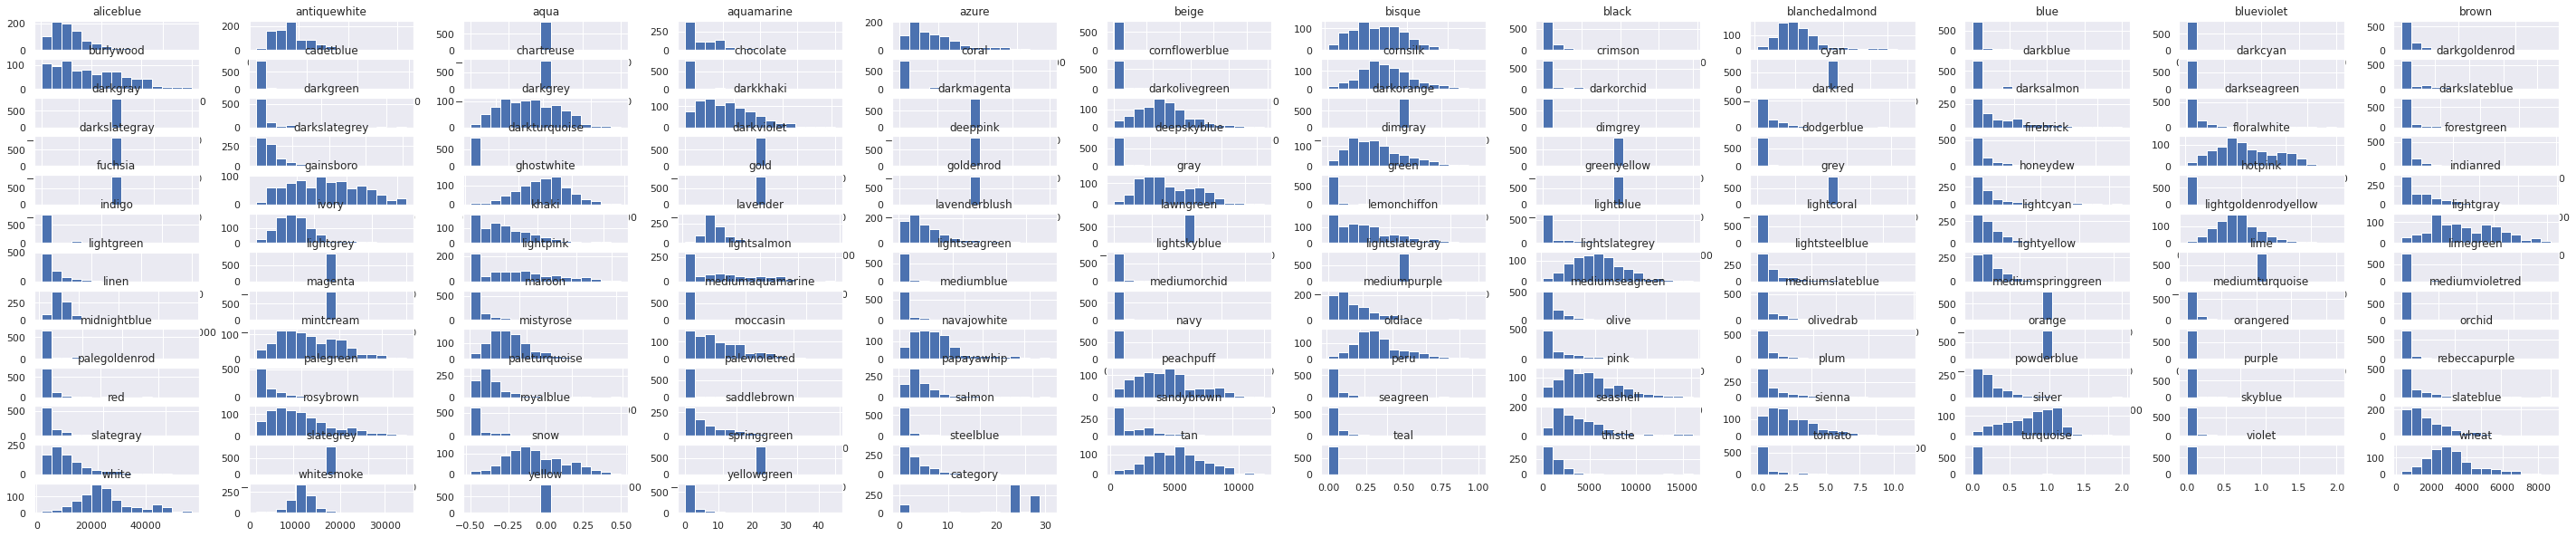

In [ ]:
#feat distribution
churn_data_s_encoded.hist(figsize=(50,10),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
cat_correlations=churn_data_s.corr()["category"]
colors=cat_correlations.sort_values(ascending=False)[1:22]
colors.index

Index(['lavender', 'lightpink', 'mistyrose', 'burlywood', 'thistle',
       'indianred', 'lightsalmon', 'rosybrown', 'lightseagreen',
       'lightsteelblue', 'darksalmon', 'steelblue', 'palevioletred',
       'lightcoral', 'royalblue', 'lightgray', 'sienna', 'dodgerblue',
       'aliceblue', 'silver', 'bisque'],
      dtype='object')

In [ ]:
selected_colors=[i for i in colors.index]
selected_colors.append('category')
print(selected_colors)
selected_data=churn_data_s[selected_colors]
selected_data.head()

['lavender', 'lightpink', 'mistyrose', 'burlywood', 'thistle', 'indianred', 'lightsalmon', 'rosybrown', 'lightseagreen', 'lightsteelblue', 'darksalmon', 'steelblue', 'palevioletred', 'lightcoral', 'royalblue', 'lightgray', 'sienna', 'dodgerblue', 'aliceblue', 'silver', 'bisque', 'category']


,lavender,lightpink,mistyrose,burlywood,thistle,indianred,lightsalmon,rosybrown,lightseagreen,lightsteelblue,darksalmon,steelblue,palevioletred,lightcoral,royalblue,lightgray,sienna,dodgerblue,aliceblue,silver,bisque,category
0,64,52,41,138,124,0,0,92,0,310,8,25,0,0,0,323,95,0,333,632,70,27
1,571,53,71,81,511,0,3,72,0,510,3,121,0,0,5,286,63,0,366,552,108,27
2,93,72,23,94,61,0,0,45,4,166,3,37,0,0,0,178,71,6,86,394,46,23
3,461,159,11,250,45,34,115,156,0,325,143,23,0,1,0,382,178,0,306,76,140,23
4,564,243,445,349,247,132,166,190,6,269,135,63,0,5,2,547,178,12,212,359,284,27


In [ ]:
#churn_data.info()

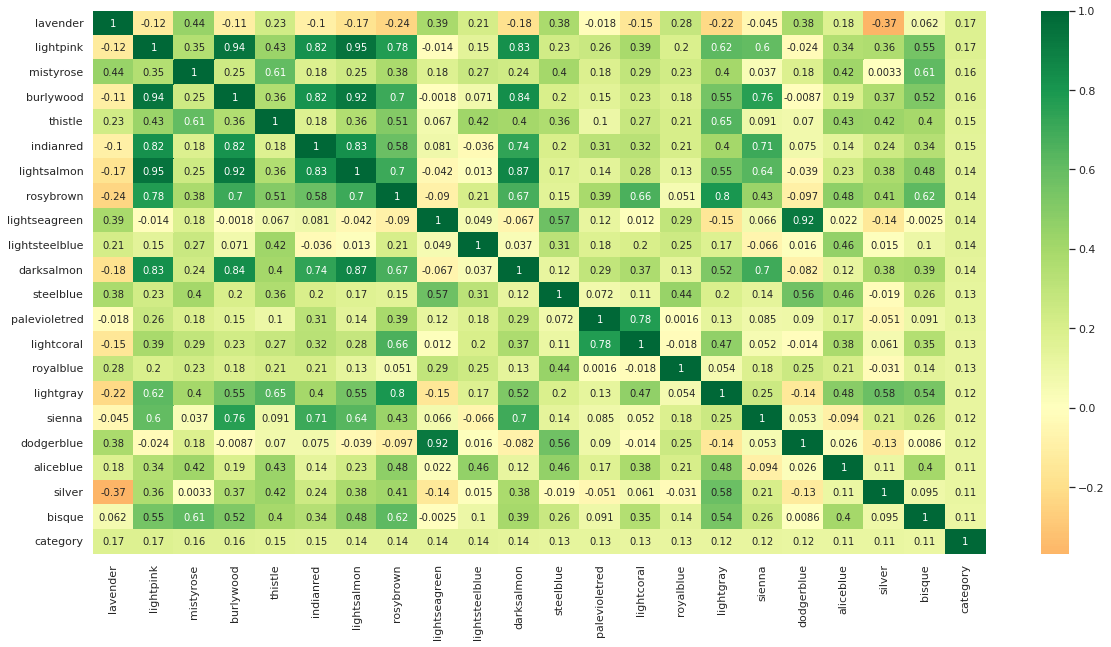

In [ ]:
#correlation btwn variable and category 
plt.figure(figsize=(20,10))
p=sns.heatmap(selected_data.corr(), annot=True,cmap='RdYlGn',center=0) 

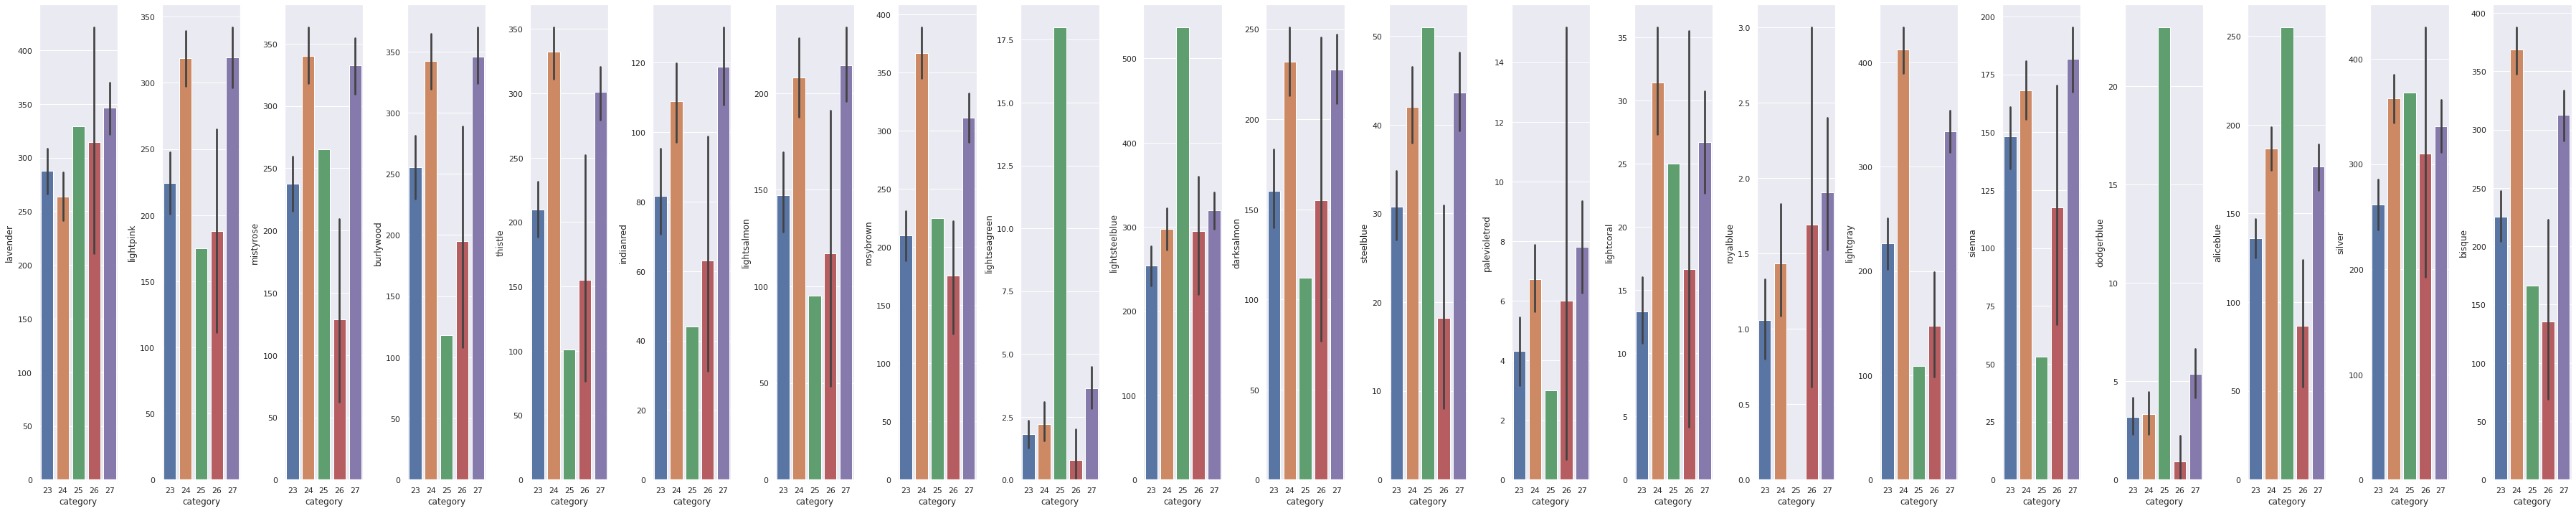

In [ ]:
#frequency?
no_of_colors=len(selected_data.columns)-1
fig,ax = plt.subplots(nrows = 1, ncols=no_of_colors, figsize=(50,10))
for i in range(no_of_colors):
    axes = ax[i]
    sns.barplot(x = selected_data['category'], y = selected_data[selected_data.columns[i]],ax = axes)
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [ ]:
L=[5,4,3]
for i, value in enumerate(L):
  print(i)
  print(value)
  print()

0
5

1
4

2
3



In [ ]:
X = churn_data_s.drop(['category'],axis=1)
y = churn_data_s.category
shape=(y.shape[0],len(y.unique()))
Y=np.zeros(shape)
for i, value in enumerate(y):
  Y[i,value-23]=1
print(y.unique())
len(y.unique())

[27 23 24 26 25]


5

In [ ]:
shape=(500,32)
np.zeros(shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.head(10)

,index,filename,aliceblue,antiquewhite,aqua,aquamarine,azure,beige,bisque,black,blanchedalmond,blue,blueviolet,brown,burlywood,cadetblue,chartreuse,chocolate,coral,cornflowerblue,cornsilk,crimson,cyan,darkblue,darkcyan,darkgoldenrod,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkorange,darkorchid,darkred,darksalmon,darkseagreen,darkslateblue,darkslategray,darkslategrey,...,palegoldenrod,palegreen,paleturquoise,palevioletred,papayawhip,peachpuff,peru,pink,plum,powderblue,purple,rebeccapurple,red,rosybrown,royalblue,saddlebrown,salmon,sandybrown,seagreen,seashell,sienna,silver,skyblue,slateblue,slategray,slategrey,snow,springgreen,steelblue,tan,teal,thistle,tomato,turquoise,violet,wheat,white,whitesmoke,yellow,yellowgreen
0,0,522,333,59,0,0,46,119,70,0,109,0,0,0,138,39,0,0,0,14,218,0,0,0,0,0,0,0,108,312,0,30,0,0,0,8,466,1,0,19,...,12,366,249,0,61,51,54,97,0,575,0,0,0,92,0,4,0,6,51,36,95,632,11,29,88,0,66,0,25,129,0,124,0,0,0,88,189,88,0,0
1,1,536,366,143,0,8,68,323,108,21,159,0,0,0,81,148,0,0,0,163,154,0,0,0,0,0,0,0,167,290,0,204,0,0,0,3,453,139,0,299,...,519,239,559,0,155,446,142,38,2,486,0,15,0,72,5,40,0,4,163,212,63,552,184,179,179,0,154,0,121,186,0,511,0,0,0,587,100,395,0,0
2,2,521,86,95,0,1,34,568,46,13,142,0,0,0,94,11,0,0,0,8,79,0,0,0,0,0,0,0,305,254,0,106,0,0,0,3,526,10,0,128,...,469,360,537,0,89,58,74,33,0,391,0,2,0,45,0,43,0,2,122,73,71,394,16,27,75,0,85,0,37,67,0,61,0,0,0,246,127,94,0,0
3,3,528,306,88,0,2,61,251,140,0,242,0,0,0,250,53,0,0,0,11,221,0,0,0,0,0,0,0,19,173,0,196,0,0,0,143,397,45,0,268,...,71,288,433,0,45,64,38,24,0,548,0,0,0,156,0,71,0,3,117,114,178,76,20,22,234,0,478,0,23,215,0,45,0,0,0,267,53,611,0,0
4,4,535,212,139,0,3,50,33,284,58,187,3,0,0,349,15,0,0,0,12,175,0,0,0,0,10,0,1,56,369,0,365,0,0,0,135,53,80,0,377,...,7,81,137,0,70,155,236,200,0,340,0,4,0,190,2,135,0,8,40,238,178,359,8,42,98,0,170,0,63,166,0,247,0,0,0,249,321,544,0,1
5,5,486,71,603,0,1,7,618,103,1,197,0,0,14,9,61,0,0,0,2,154,7,0,0,0,0,0,0,27,43,0,2,0,0,15,9,614,9,0,132,...,512,166,17,0,125,453,107,5,0,205,0,2,17,5,0,0,0,0,89,157,2,24,18,2,25,0,23,0,0,19,0,76,2,0,0,588,20,57,0,0
6,6,490,5,498,0,0,3,628,44,0,64,0,0,0,58,6,0,0,0,2,0,0,0,0,0,0,0,0,114,319,0,16,0,0,0,2,626,1,0,1,...,563,359,1,0,1,187,10,0,0,144,0,0,0,18,0,0,0,1,178,0,52,181,20,7,27,0,0,0,11,153,0,0,0,0,0,519,0,1,0,10
7,7,499,84,37,0,2,36,161,240,7,176,0,0,0,129,11,0,0,0,21,115,0,0,0,0,0,0,0,112,215,0,164,0,0,0,28,600,9,0,113,...,446,143,91,0,92,110,43,107,0,69,0,3,0,50,0,38,0,6,61,255,98,20,19,40,31,0,151,0,31,113,0,86,0,0,0,354,331,334,0,1
8,8,506,252,41,0,1,73,22,354,17,138,0,0,9,471,27,0,0,0,20,186,0,0,0,0,14,0,0,81,405,0,441,0,0,16,274,412,16,0,259,...,83,60,166,41,54,249,151,244,14,142,0,6,14,317,1,227,1,11,21,63,290,62,13,23,62,0,218,0,42,263,0,68,0,0,0,385,260,483,0,0
9,9,513,52,21,0,1,12,143,139,1,54,0,0,0,125,54,0,0,0,34,27,0,0,0,0,3,0,0,101,347,0,282,0,0,0,61,530,12,0,92,...,560,373,253,2,4,84,19,70,0,431,0,0,0,59,0,65,0,2,161,25,87,551,14,77,204,0,111,0,35,91,0,41,0,0,0,48,126,181,0,0


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'sigmoid'))


# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print (X_train.shape)
print (y_train.shape)
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 500,verbose = 0)
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

(430, 150)
(430, 5)
43/43 [==============================] - 0s 1ms/step - loss: 8.7357e-08 - accuracy: 1.0000
Train score: 8.735735690379443e-08
Train accuracy: 1.0
********************
22/22 [==============================] - 0s 2ms/step - loss: 5.6560 - accuracy: 0.4528
Test score: 5.65596342086792
Test accuracy: 0.4528301954269409


In [ ]:
#p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.51      0.46        59
           1       0.60      0.53      0.56        70
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         5
           4       0.43      0.42      0.43        78

   micro avg       0.47      0.47      0.47       212
   macro avg       0.29      0.29      0.29       212
weighted avg       0.47      0.47      0.47       212
 samples avg       0.45      0.47      0.45       212



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#from sklearn.metrics import roc_curve
#y_pred_proba = classifier.predict_proba(X_test)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#plt.plot([0,1],[0,1],'k--')
#plt.plot(fpr,tpr, label='ANN')
#plt.xlabel('fpr')
#plt.ylabel('tpr')
#plt.title('ROC curve')
#plt.show()

In [ ]:
#Area under ROC curve
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,y_pred_proba)